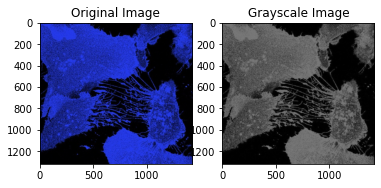

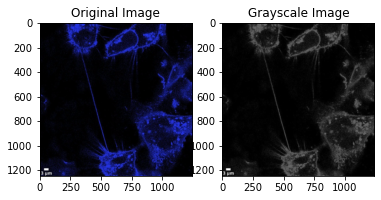

In [51]:
import cv2
import matplotlib.pyplot as plt
img_paths = ['img.png', 'img2.png']

def readin_image(path):
    img = cv2.imread(path)
    if img is None:
        print(f"Error: Could not read image from {path}.")
    return img

imgs = [readin_image(path) for path in img_paths]
imgs_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imgs if img is not None]

for i, img in enumerate(imgs):
    plt.subplot(1,2,1)  
    plt.imshow(img) 
    plt.title('Original Image') 
    plt.subplot(1,2,2)  
    plt.imshow(imgs_gray[i],cmap='gray')
    plt.title('Grayscale Image')
    plt.show()

In [53]:
import matplotlib.pyplot as plt
import numpy as np
def tnt_plot(frame,edges,lines,title='Img1'):
    plt.figure(figsize=(12, 12))
    plt.subplot(1,3,1)
    #plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.imshow(frame, cmap='gray')
    plt.title(f'{title} Grayscale Image')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(edges, cmap='jet')
    plt.title(f"Canny Edges: {np.count_nonzero(edges)} pixels")
    plt.axis('off')

    plt.subplot(1,3,3)
    frame_with_lines = frame.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(frame_with_lines, cv2.COLOR_BGR2RGB))
    plt.title(f"Hough Lines Fitted: {len(lines)}")
    plt.axis('off')
    plt.show()

    return()

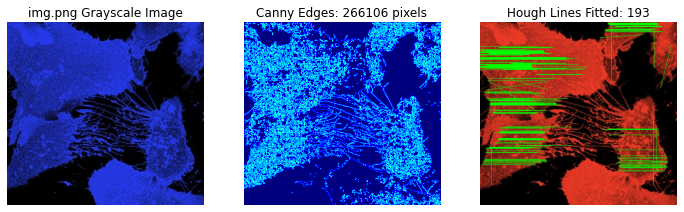

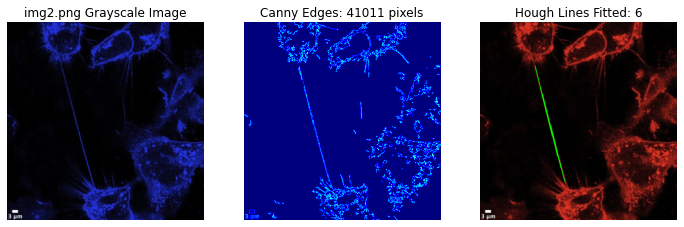

In [55]:
from matplotlib.cm import get_cmap

def merge_lines(lines, angle_thresh=np.pi/180 * 5, dist_thresh=30):
    if lines is None:
        return []
    merged = []
    for l1 in lines:
        x1, y1, x2, y2 = l1[0]
        angle1 = np.arctan2(y2 - y1, x2 - x1)
        found = False
        for idx, (mx1, my1, mx2, my2) in enumerate(merged):
            angle2 = np.arctan2(my2 - my1, mx2 - mx1)
            if abs(angle1 - angle2) < angle_thresh:
                if (np.hypot(mx1 - x1, my1 - y1) < dist_thresh or
                    np.hypot(mx2 - x2, my2 - y2) < dist_thresh):
                    # Merge lines: just extend the endpoints
                    merged[idx] = (
                        min(mx1, x1), min(my1, y1),
                        max(mx2, x2), max(my2, y2)
                    )
                    found = True
                    break
        if not found:
            merged.append((x1, y1, x2, y2))
    return merged

def detect_TNT(frame, canny_threshold=(5,40)):
    height, width, _ = frame.shape
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (3,3), 0)
    
    # Step 2: Edge detection
    edges = cv2.Canny(blurred, *canny_threshold)

    # print(edges.shape)
    # # Step 3: Visualize edges
    # plt.figure(figsize=(10, 5))
    # plt.imshow(edges, cmap='jet')
    # plt.title(f"Canny Edges: {np.count_nonzero(edges)} pixels")
    # plt.axis('off')
    # plt.show()
    #remove edges near logo
    #edges[:logo_crop[1],:logo_crop[0]] = 0
    #this looks pretty good with theset setttings
    #return(edges, _)

    # # Create a copy of the original frame
    # output_frame = frame.copy()
    
    # # Step 3: Overlay edges on the original image
    # # Convert edges to a green overlay
    # c_edges = np.zeros_like(output_frame)
    # c_edges[:sky_crop, :, 0] = edges  # Place edges in the red channel
    
    # Combine the green edges with the original frame
    #overlaid_frame = cv2.addWeighted(output_frame, 0.8, c_edges, 1, 0) 
    #return(overlaid_frame,_)

    # Optional: Dilate the edges
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    # Find contours
    #contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    lines = cv2.HoughLinesP(dilated_edges, rho=2, theta=np.pi/90, threshold=80, minLineLength=300, maxLineGap=5)
 
    # Create an output frame for visualization
    overlaid_frame = frame.copy()

    #lines = merge_lines(lines)

    # Draw lines
    #line_img = frame.copy()
    if lines is not None:
        #for x1, y1, x2, y2 in lines:
        #    cv2.line(overlaid_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        for x1, y1, x2, y2 in lines[:, 0]:
            cv2.line(overlaid_frame, (x1, y1), (x2, y2), (0, 255, 0), 5)

    # for i, contour in enumerate(contours):
    #     # Normalize the color index to the range of the colormap
    #     color = cmap(i / len(contours))  # Get RGBA color from colormap
    #     color_rgb = tuple(int(255 * c) for c in color[:3])  # Convert to RGB (0-255)
        
    #     # Draw the contour with the assigned color
    #     cv2.drawContours(overlaid_frame, [contour], -1, color_rgb, 2)
        
    return overlaid_frame, edges, lines

for i in range(len(imgs)):
    frame, edges, lines = detect_TNT(imgs[i],canny_threshold=(100, 30),)
    tnt_plot(imgs[i],edges,lines,title=img_paths[i])
# plt.title(f"Hough Lines Fitted: {len(lines)}")
# plt.show()

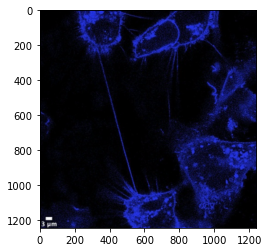

In [47]:
plt.imshow(img)